# <center>Préparation des données projet 7</center>

## <center>Importation des librairies</center>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <center>Importation des dataset</center>

In [2]:
ip = pd.read_excel("Table info_pro.xlsx")
r = pd.read_excel("Table remuneration.xlsx")
s = pd.read_excel("Table Salari‚s.xlsx")

## <center>Exploratory Data Analysis</center>

In [3]:
print("ip shape =", ip.shape)
print("r shape =", r.shape)
print("s shape =", s.shape)

ip shape = (256, 6)
r shape = (256, 7)
s shape = (256, 7)


In [4]:
ip.head(10)

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction
0,16000206-8278,12.6,59,Marketing,Non,67
1,16011205-0331,11.8,31,Commercial,Oui,66
2,16020327-1465,11.9,65,RH,Non,59
3,16020701-3376,10.2,59,Compta Finances,Non,60
4,16020725-8401,7.9,59,Consultant,Non,34
5,16021124-8356,8.6,34,RH,Oui,84
6,16021125-4271,14.9,36,Commercial,Non,62
7,16030220-7121,6.3,23,Consultant,Non,69
8,16030828-8604,18.2,23,Commercial,Oui,54
9,16031007-1667,23.1,49,Commercial,Oui,31


In [5]:
r.head(10)

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35,9873.5000,13,0.0,0.0
1,16990414-3527,CDI,35,4296.7167,39,0.0,1.0
2,16981206-3817,CDI,35,3705.2167,29,1.0,1.0
3,16970415-1050,CDI,35,1697.1500,17,1.0,0.0
4,16960906-7989,CDD,35,2848.3000,15,1.0,0.0
5,16960628-0338,CDI,35,5464.5500,34,0.0,0.0
6,16960619-9017,CDI,35,9999.3833,27,0.0,1.0
7,16951117-9468,CDI,24,3116.8800,37,0.0,1.0
8,16950828-2259,CDI,24,5462.0800,39,0.0,1.0
9,16950514-2464,CDI,35,2769.4333,33,0.0,0.0


In [6]:
s.head(10)

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599,1955-07-07,Célibataire,1
1,16661123-8764,H,Nicolas Jaccoud,660029842,1970-09-22,Célibataire,3
2,16230718-4297,F,Alexandra Auguste,629910592,1965-03-01,Marié,1
3,16130305-6954,F,Marie-Claire Besnard,685888970,1963-09-02,NaN,1
4,16360125-5924,F,Marie Berengar,624840475,1959-04-02,Marié,3
5,16520612-7770,F,Marie-Madeleine Frère,697029629,1960-12-18,Célibataire,2
6,16860412-1965,H,Côme Martin,647351913,1975-10-18,Marié,1
7,16551001-4151,F,Agathe Berengar,608137743,1970-11-03,Marié,2
8,16220420-6227,H,Christophe Mallette,683794378,1975-02-05,NaN,0
9,16550904-2932,F,Julie Botrel,661890256,1969-05-14,Célibataire,3


In [7]:
ip.isnull().sum()

id_salarié                   0
Ancienneté_an                0
Distance domicile/Travail    0
Service                      0
Work_accident                0
Niveau de satisfaction       0
dtype: int64

In [8]:
r.isnull().sum()

id_salarié               0
Contrat                  0
Durée hebdo              0
Salaire base mensuel     0
%variable_moyen          0
Augmentation            15
Promotion               15
dtype: int64

In [9]:
s.isnull().sum()

id_salarié         0
Sexe               0
Prénom/Nom         0
Telephone          0
Date_naissance     0
Etat Civil        82
Enfants            0
dtype: int64

*J'ai 3 dataset, chacun a une colonne "id_salarié", je peux donc les regrouper grâce à cette colonne.*

*Il faut d'abord que je vérifie l'unicité des clé primaires.*

### Unicité des clés primaires

In [10]:
ip.duplicated().sum()

0

In [11]:
ip["id_salarié"].duplicated().sum()

0

In [12]:
r.duplicated().sum()

0

In [13]:
r["id_salarié"].duplicated().sum()

0

In [14]:
s.duplicated().sum()

0

In [15]:
s["id_salarié"].duplicated().sum()

0

In [16]:
s["Prénom/Nom"].duplicated().sum()

0

*Il n'y a pas de doublons, chaque lignes de mes 3 dataset est unique, je vais pouvoir créer un seul dataset.*

### Rassemblement

In [17]:
df = ip.merge(r, how='left', on='id_salarié')

In [18]:
df.shape

(256, 12)

In [19]:
df = df.merge(s, how='left', on='id_salarié')

In [20]:
df.shape

(256, 18)

In [21]:
df.head()

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16000206-8278,12.6,59,Marketing,Non,67,CDI,35,6583.8500,13,1.0,1.0,F,Pascale Duclos,677289138,1958-12-07,NaN,2
1,16011205-0331,11.8,31,Commercial,Oui,66,CDI,24,4974.3200,32,0.0,1.0,F,Nicole Affré,640934749,1957-04-23,Célibataire,2
2,16020327-1465,11.9,65,RH,Non,59,CDI,32,8860.8000,19,1.0,1.0,F,Marie-Claire Bachelet,609243379,1973-08-19,Célibataire,3
3,16020701-3376,10.2,59,Compta Finances,Non,60,CDI,35,8328.0167,14,1.0,0.0,F,Claire Chagnon,683289092,1981-10-09,Célibataire,1
4,16020725-8401,7.9,59,Consultant,Non,34,CDI,35,7304.2667,17,1.0,0.0,F,Séverine Gaumont,684333280,1979-04-26,Marié,0


In [22]:
df.isnull().sum()

id_salarié                    0
Ancienneté_an                 0
Distance domicile/Travail     0
Service                       0
Work_accident                 0
Niveau de satisfaction        0
Contrat                       0
Durée hebdo                   0
Salaire base mensuel          0
%variable_moyen               0
Augmentation                 15
Promotion                    15
Sexe                          0
Prénom/Nom                    0
Telephone                     0
Date_naissance                0
Etat Civil                   82
Enfants                       0
dtype: int64

*Le rassemblement c'est bien passé, je vais maintenant regarder plus en détails les valeurs manquantes.*

### Valeurs manquantes

In [23]:
df.isnull().sum()

id_salarié                    0
Ancienneté_an                 0
Distance domicile/Travail     0
Service                       0
Work_accident                 0
Niveau de satisfaction        0
Contrat                       0
Durée hebdo                   0
Salaire base mensuel          0
%variable_moyen               0
Augmentation                 15
Promotion                    15
Sexe                          0
Prénom/Nom                    0
Telephone                     0
Date_naissance                0
Etat Civil                   82
Enfants                       0
dtype: int64

#### Etat Civil

In [24]:
na = df.loc[df.isnull().any(axis=1)]
na = pd.DataFrame(na)
na["Etat Civil"].value_counts()

Marié          7
Célibataire    4
Name: Etat Civil, dtype: int64

*La mention de l'état civil n'est pas vraiment importante du fait que j'ai toutes la valeurs pour la colonne "Sexe".*

#### Augmentation et Promotion

*Pour les colonnes "Augmentation" et "Promotion" à voir en fonction des indicateurs choisies dans le diagnostic.*

*Peut-être que le fait de ne pas avoir de valeurs dans ces deux colonnes veut dire qu'il n' y a tout simplement pas eu de promotion ou d'augmentation par exemple car la personne n'est pas assez ancienne dans l'entreprise, ou bien que c'est un CDD...*

In [25]:
na["Augmentation"].value_counts()

1.0    43
0.0    35
Name: Augmentation, dtype: int64

In [26]:
na_augmentation = na[na["Augmentation"].isnull()]
na_augmentation = pd.DataFrame(na_augmentation)
print(na_augmentation["Contrat"].value_counts())
len(na_augmentation)

CDD    15
Name: Contrat, dtype: int64


15

In [27]:
na["Promotion"].value_counts()

0.0    40
1.0    38
Name: Promotion, dtype: int64

In [28]:
na_promotion= na[na["Promotion"].isnull()]
na_promotion = pd.DataFrame(na_promotion)
print(na_promotion["Contrat"].value_counts())
len(na_promotion)

CDD    15
Name: Contrat, dtype: int64


15

In [29]:
na_augmentation.index

Int64Index([18, 23, 68, 111, 113, 130, 169, 173, 187, 189, 199, 203, 207, 209,
            229],
           dtype='int64')

In [30]:
na_promotion.index

Int64Index([18, 23, 68, 111, 113, 130, 169, 173, 187, 189, 199, 203, 207, 209,
            229],
           dtype='int64')

*En explorant un peu plus les colonnes "Augmentation" et "Promotion", l'on voit que:*

*-Il y a 15 valeurs maquantes*

*-Ces valeurs maquantes correspondent toutes à des CDD, donc l'absence de promotions ou d'aumentations est normale.*

*-Les index sont identiques pour les deux colonnes.*

*-En regardant les differentes valeurs il n'y en a que 2 types 1.0 ou 0.0 ce qui doit surment signifier oui ou non.*

***Actions pour les valeurs manquantes.***

Etat Civil

*Les valeurs manquantes pour l'état civil sont au nombre de 82 sur 256 lignes cela fait environ 30% de la colonne.*

*De plus travaillant sur l'égalité homme/femme, l'état civil n'est pas important.*

*Je vais donc supprimer la colonne "Etat Civil".*

Promotion et Augmentation

*Les valeurs manquantes pour ces colonnes existent du fait de la nature de contrat du salarié.*

*Il faut donc conserver ces valeurs et les remplacer par 0.0.*

In [31]:
df.drop(["Etat Civil"], axis = 1, inplace = True)

In [32]:
df.columns

Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction', 'Contrat', 'Durée hebdo',
       'Salaire base mensuel', '%variable_moyen', 'Augmentation', 'Promotion',
       'Sexe', 'Prénom/Nom', 'Telephone', 'Date_naissance', 'Enfants'],
      dtype='object')

In [33]:
df.dtypes

id_salarié                           object
Ancienneté_an                       float64
Distance domicile/Travail             int64
Service                              object
Work_accident                        object
Niveau de satisfaction                int64
Contrat                              object
Durée hebdo                           int64
Salaire base mensuel                float64
%variable_moyen                       int64
Augmentation                        float64
Promotion                           float64
Sexe                                 object
Prénom/Nom                           object
Telephone                             int64
Date_naissance               datetime64[ns]
Enfants                               int64
dtype: object

In [34]:
df["Augmentation"].fillna(value=0.0, inplace = True)
df["Promotion"].fillna(value=0.0, inplace = True)

In [35]:
df.isnull().sum()

id_salarié                   0
Ancienneté_an                0
Distance domicile/Travail    0
Service                      0
Work_accident                0
Niveau de satisfaction       0
Contrat                      0
Durée hebdo                  0
Salaire base mensuel         0
%variable_moyen              0
Augmentation                 0
Promotion                    0
Sexe                         0
Prénom/Nom                   0
Telephone                    0
Date_naissance               0
Enfants                      0
dtype: int64

In [36]:
df.columns

Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction', 'Contrat', 'Durée hebdo',
       'Salaire base mensuel', '%variable_moyen', 'Augmentation', 'Promotion',
       'Sexe', 'Prénom/Nom', 'Telephone', 'Date_naissance', 'Enfants'],
      dtype='object')

In [37]:
df.describe()

,Ancienneté_an,Distance domicile/Travail,Niveau de satisfaction,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion,Telephone,Enfants
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02,256.000000
mean,13.160938,38.433594,50.687500,33.871094,5326.530626,20.027344,0.488281,0.488281,6.511928e+08,1.460938
std,7.020684,19.834301,27.837413,3.203397,2505.493530,11.529809,0.500842,0.500842,2.915357e+07,1.123038
min,0.300000,3.000000,1.000000,24.000000,1059.760000,0.000000,0.000000,0.000000,6.003126e+08,0.000000
25%,7.375000,22.000000,30.000000,35.000000,3111.918325,10.000000,0.000000,0.000000,6.251080e+08,0.000000
50%,12.750000,40.500000,50.500000,35.000000,5084.625000,19.000000,0.000000,0.000000,6.514391e+08,1.000000
75%,19.300000,57.000000,73.000000,35.000000,7407.020850,30.000000,1.000000,1.000000,6.783984e+08,2.000000
max,25.000000,70.000000,100.000000,35.000000,9999.383300,40.000000,1.000000,1.000000,6.991239e+08,3.000000


In [38]:
df["Service"].value_counts()

Consultant         69
Commercial         52
RH                 43
Compta Finances    41
Marketing          36
R&D                15
Name: Service, dtype: int64

In [39]:
df["Work_accident"].value_counts()

Oui    129
Non    127
Name: Work_accident, dtype: int64

In [40]:
df["Contrat"].value_counts()

CDI    240
CDD     16
Name: Contrat, dtype: int64

In [41]:
df["Sexe"].value_counts()

H    131
F    125
Name: Sexe, dtype: int64

## <center>Respect du RGPD</center>

### <center>Les grands principes de protection des données personnelles</center>

Les 5 grands principes des règles de protection des données personnelles sont les suivants :
    
Le principe de finalité: le responsable d'un fichier ne peut enregistrer et utiliser des informations sur des personnes physiques que dans un but bien précis, légal et légitime ;
    
Le principe de proportionnalité et de pertinence: les informations enregistrées doivent être pertinentes et strictement nécessaires au regard de la finalité du fichier ;
    
Le principe d'une durée de conservation limitée: il n'est pas possible de conserver des informations sur des personnes physiques dans un fichier pour une durée indéfinie. Une durée deconservation précise doit être fixée, en fonction du type d'information enregistrée et de la finalité du fichier ;

Le principe de sécurité et de confidentialité: le responsable du fichier doit garantir la sécurité et la confidentialité des informations qu'il détient. Il doit en particulier veiller à ce que seules les personnes autorisées aient accès à ces informations ;

Les droits des personnes

***

Le principe de finalité --> est respecté car il est question ici d'un regroupement de données dans le but de répondre à une demande gouvernamentales obligatoire.

Le principe de proportionnalité et de pertinence --> quelles sont les données réellement nécessaire par exemple la date de naissance, les noms prénom, etat civil et nombres d'enfants ne le sont pas.

Le principe d'une durée de conservation limitée --> Ces données ne seront conservées que pendant 1 an, jusqu'au prochain calcul de l'index.

Le principe de sécurité et de confidentialité --> Les données sont stockées et utilisées en interne et anonymisées.

Les droits des personnes --> informer les personnes concernés de la collecte des données, pouvoir répondre dans les délais (1 mois) concernants les demandes faits par les personnes dont les données ont été collectées (demandes de suppressions / modifications / consultations)

***

Remplir le registre de traitement

***

### <center>Anonymisation des données personnelles</center>

*Je vais maintenant procéder à l'anonymisation des données*

*Il faut que je supprime les données personnelles inutiles:*

*-Nom et Prénom*

*-Téléphone*

*-Date de naissance*

*-Etat Civil (déjà fait plus haut)*

*-Enfant*

In [42]:
df.drop(['Prénom/Nom', 'Telephone', 'Date_naissance', 'Enfants'], axis = 1, inplace = True)

In [43]:
df.columns

Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction', 'Contrat', 'Durée hebdo',
       'Salaire base mensuel', '%variable_moyen', 'Augmentation', 'Promotion',
       'Sexe'],
      dtype='object')

## <center>Graphiques</center>

Les différentes indicateurs utilisés sont:

- Embauche

- Promotion

- Conditions de travail

- Rémunération effective

- Articulation des temps

In [50]:
dfcopy = df.copy()

### Embauche (Quelle est la répartition des h/f par CDI et par CDD ?)

In [58]:
embauche = pd.crosstab(dfcopy["Contrat"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
embauche

Sexe,F,H
Contrat,,
CDD,11,5
CDI,114,126


<AxesSubplot:xlabel='Contrat'>

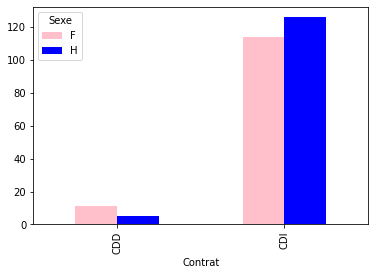

In [124]:
embauche.plot(kind='bar', color=['pink', 'blue'])

### Embauche (Quelle est la répartition des embauche h/f en nombre ?) XXX

<AxesSubplot:xlabel='Sexe', ylabel='count'>

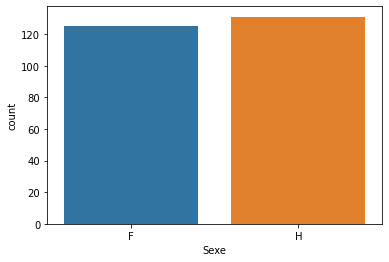

In [129]:
sns.countplot(x="Sexe", data=dfcopy)

(array([125.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 131.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

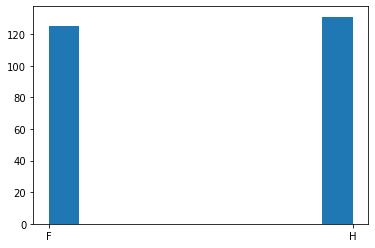

In [141]:
plt.hist(dfcopy["Sexe"])

### Embauche (Quelle est la répartition par service des h/f ?)

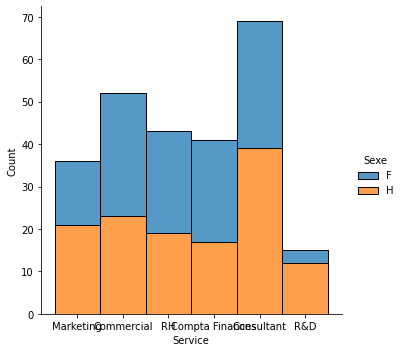

In [130]:
sns.displot(data=dfcopy, x="Service", hue="Sexe", multiple="stack")

In [131]:
service = pd.crosstab(dfcopy["Service"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
service

Sexe,F,H
Service,,
Commercial,29,23
Compta Finances,24,17
Consultant,30,39
Marketing,15,21
R&D,3,12
RH,24,19


<AxesSubplot:xlabel='Service', ylabel='count'>

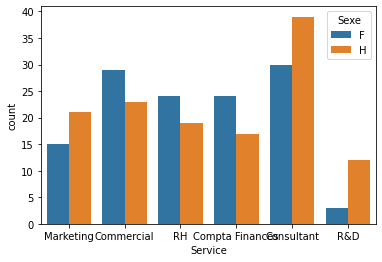

In [132]:
sns.countplot(x="Service", hue="Sexe", data=dfcopy)

### Promotion (Quelle est la répartition des h/f par promotions ?)

In [60]:
promotion = pd.crosstab(dfcopy["Promotion"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
promotion

Sexe,F,H
Promotion,,
0.0,63,68
1.0,62,63


<AxesSubplot:xlabel='Promotion'>

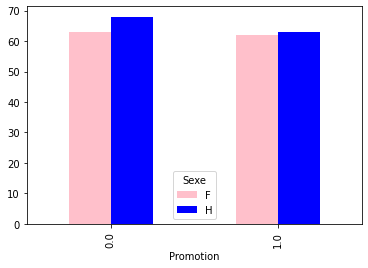

In [125]:
promotion.plot(kind='bar', color=['pink', 'blue'])

### Conditions de travail (Quelle est la répartition des h/f par durée hebdomadaire de travail ?)

In [62]:
cdt = pd.crosstab(dfcopy["Durée hebdo"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
cdt

Sexe,F,H
Durée hebdo,,
24,11.0,11.0
28,NaN,5.0
32,3.0,1.0
35,111.0,114.0


<AxesSubplot:xlabel='Durée hebdo'>

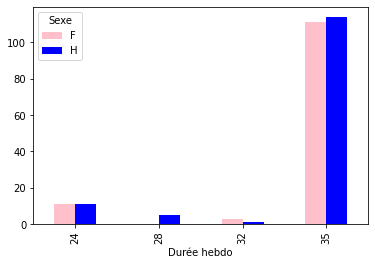

In [126]:
cdt.plot(kind='bar', color=['pink', 'blue'])

### Conditions de travail (Quelle est la répartition des h/f par accident de travail ?)

In [133]:
adt = pd.crosstab(dfcopy["Work_accident"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
adt

Sexe,F,H
Work_accident,,
Non,62,65
Oui,63,66


<AxesSubplot:xlabel='Work_accident'>

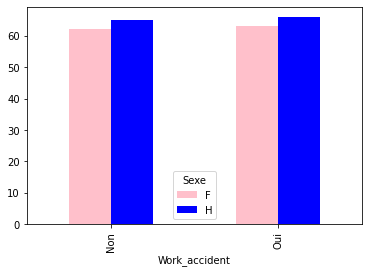

In [134]:
adt.plot(kind='bar', color=['pink', 'blue'])

### Rémunération effective (obligatoire) (Quelle est la répartition h/f par salaire ?)

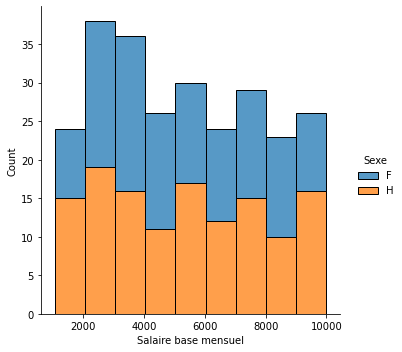

In [128]:
sns.displot(data=dfcopy, x="Salaire base mensuel", hue="Sexe", multiple="stack")

In [102]:
def salaire_range(salaire):
    step = [
        {'range': (1000,1999), 'val': '1000'},
        {'range': (2000,2999), 'val': '2000'},
        {'range': (3000,3999), 'val': '3000'},
        {'range': (4000,4999),'val': '4000'},
        {'range': (5000,5999),'val': '5000'},
        {'range': (6000,6999),'val': '6000'},
        {'range': (7000,7999),'val': '7000'},
        {'range': (8000,8999),'val': '8000'},
        {'range': (9000,9999),'val': '9000'},
        {'range': (10000,10999),'val': '10000'}]

    for i in step:
        if i['range'][0] <= salaire <= i['range'][1]:
            return i['val']

dfcopy['salaire_range'] = dfcopy['Salaire base mensuel'].apply(salaire_range)

<AxesSubplot:xlabel='salaire_range', ylabel='count'>

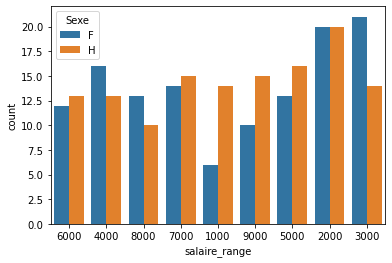

In [113]:
sns.countplot(x="salaire_range", hue="Sexe", data=dfcopy)

### Articulation des temps (Quelle est la répartition h/f par distance domicile travail (cela représente du temps passé dans les transports) ?)

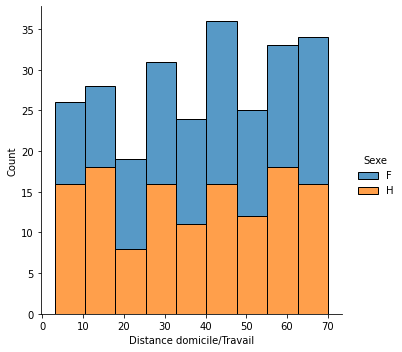

In [67]:
sns.displot(data=dfcopy, x="Distance domicile/Travail", hue="Sexe", multiple="stack")

In [145]:
def time_range(temps):
    step = [
        {'range': (1,9), 'val': '1-9'},
        {'range': (10,19), 'val': '10-19'},
        {'range': (20,29), 'val': '20-29'},
        {'range': (30,39),'val': '30-39'},
        {'range': (40,49),'val': '40-49'},
        {'range': (50,59),'val': '50-59'},
        {'range': (60,69),'val': '60-69'},
        {'range': (70,79),'val': '70-79'}]

    for i in step:
        if i['range'][0] <= temps <= i['range'][1]:
            return i['val']

dfcopy['time_range'] = dfcopy['Distance domicile/Travail'].apply(time_range)

In [147]:
ddt = pd.crosstab(dfcopy["time_range"], dfcopy["Sexe"], values=dfcopy["Sexe"], rownames=None, colnames=None, aggfunc="count")
ddt

Sexe,F,H
time_range,,
1-9,10,16
10-19,13,19
20-29,15,18
30-39,19,16
40-49,24,22
50-59,22,11
60-69,20,28
70-79,2,1


<AxesSubplot:xlabel='time_range'>

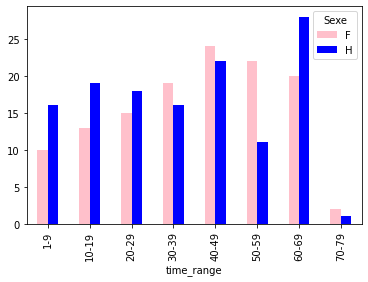

In [149]:
ddt.plot(kind='bar', color=['pink', 'blue'])

In [142]:
dfcopy["Distance domicile/Travail"].describe()

count    256.000000
mean      38.433594
std       19.834301
min        3.000000
25%       22.000000
50%       40.500000
75%       57.000000
max       70.000000
Name: Distance domicile/Travail, dtype: float64

In [143]:
dfcopy.columns

Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction', 'Contrat', 'Durée hebdo',
       'Salaire base mensuel', '%variable_moyen', 'Augmentation', 'Promotion',
       'Sexe', 'salaire_range'],
      dtype='object')

In [150]:
dfcopy.dtypes

id_salarié                    object
Ancienneté_an                float64
Distance domicile/Travail      int64
Service                       object
Work_accident                 object
Niveau de satisfaction         int64
Contrat                       object
Durée hebdo                    int64
Salaire base mensuel         float64
%variable_moyen                int64
Augmentation                 float64
Promotion                    float64
Sexe                          object
salaire_range                 object
time_range                    object
dtype: object

In [179]:
hashtest = s.copy()
hashtest.head(5)

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599,1955-07-07,Célibataire,1
1,16661123-8764,H,Nicolas Jaccoud,660029842,1970-09-22,Célibataire,3
2,16230718-4297,F,Alexandra Auguste,629910592,1965-03-01,Marié,1
3,16130305-6954,F,Marie-Claire Besnard,685888970,1963-09-02,NaN,1
4,16360125-5924,F,Marie Berengar,624840475,1959-04-02,Marié,3


In [180]:
import hashlib

In [181]:
result = hashlib.md5("ezezeze".encode())
  
print(result.hexdigest())

757c25e8eee82174ab28d154fb1f3d30


In [182]:
# Apply hashing function to the column
hashtest['Prénom/Nom'] = hashtest['Prénom/Nom'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

In [185]:
hashtest['Telephone'] = hashtest['Telephone'].astype(str)

In [186]:
# Apply hashing function to the column
hashtest['Telephone'] = hashtest['Telephone'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

In [189]:
hashtest['Date_naissance'] = hashtest['Date_naissance'].astype(str)

In [190]:
# Apply hashing function to the column
hashtest['Date_naissance'] = hashtest['Date_naissance'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

In [194]:
hashtest['Enfants'] = hashtest['Enfants'].astype(str)

In [195]:
# Apply hashing function to the column
hashtest['Enfants'] = hashtest['Enfants'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

In [196]:
hashtest

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,22ea22c4215786ee0c7ea0142bdd1d29d7b3273bec93d3...,b331e59aef3935634a37712bf39c9c77521d1d2b4de928...,abbd4e8ad27a87aadc77a0ed1f7deba715a3736bd468d6...,Célibataire,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1,16661123-8764,H,3f92af4256b483576aa763b9e9075e20fc1ca9633a78ec...,3ccf74c022592117052250064447acb14c573a46fbcd79...,88ec8141913632729eab9fc241d9c2fb51f970bc122d16...,Célibataire,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
2,16230718-4297,F,d6f00cd2b22cf196396dc4d6db457348a9b3eb7fa32788...,23eca70594aab389c02d61f0eccd53bd7215ad39f0dd83...,f5392bb659cf90b454d59cd7dcb8cb3170ca2864f0e6f4...,Marié,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
3,16130305-6954,F,eea7745b9935c0197bab078e5eb9f0ce697cf14d8f1ee4...,93e5fd953fe769c9db171ba8bc95ecd61b25bc9470c832...,2713282d090878db6a5d2f99e667cdf279d09b9ca6ba62...,NaN,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
4,16360125-5924,F,3eff923b05fd50e47c359fe4396be5267ac900aae2859f...,dfeaae6db1a71cf816dcfa1acd557d10f5113da2781c73...,1eb9cfe4dae8708250cfa5659651eeef3d583d456188b2...,Marié,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
...,...,...,...,...,...,...,...
251,16081104-1011,F,db5f069aeb61add5994719830143e5d0a36e96abf082b4...,38377d4fdaa34dfe5d0815f3c793f827710c55ecf855c5...,5c222cf55c6cc4fd8387abb53878ddfcdaf32bb4512d10...,Marié,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
252,16670913-0147,F,a4076e0b3373933a35331a21e6ef649351603288d3d105...,994ed8aa18f7b5848089f419b8e1e42855d8c69a85a40b...,f3dca6b732311cd18f7e0665f42f752f6996fcb8e29fd2...,Célibataire,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
253,16730918-6273,F,1f5ad8ecd7b949c50bb2a5be2e87163925fee68fd36f74...,ccb8af82611410899be983ffda32259a88bfbf878dde82...,2db01e91388e515734d29b5740d67410ff33f751c0252a...,Marié,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
254,16770802-4604,F,9959bd318844485a8dd11a89c586e7778d85f0ab89043d...,7e48046b9cdecf18a9413c9a9e7f504dbf7fde2ddcca51...,2f91214347f70eed15e2621f3de46183ca13eb76194ee7...,Marié,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
